In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#Tip: In Jupyter Notebook, you can also include %matplotlib inline to display your plots inside your notebook.
import seaborn as sns

In [2]:
#read dataset
df = pd.read_csv('Pokemon.csv', index_col=0,header=0,encoding = 'unicode_escape')


In [3]:
df.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# SCATTER PLOT

One of the Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the  "lmplot()" function.

There are 2 ways we can do so.
1. The first way (recommended)is to pass your dataframe to the data= arguement, while passing column names to the axes arguements, x= and y=
2. The secoond way is to directly pass in Series of data to the axes arguements.


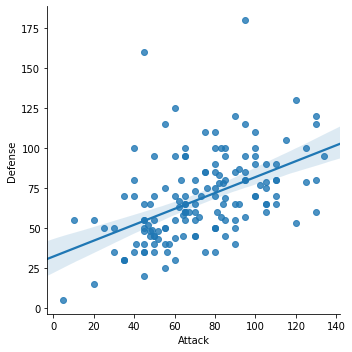

In [4]:
#recommended way
sns.lmplot(x='Attack',y='Defense',data=df)

#alternative way
#sns.lmplot(x=df.Attack, y=df.defense)

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagnol line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the lmplot():

1. First, we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.

2. Then, we'll set hue='Stage' to color our points by the pokemon's evolution stage. This hue arguements is very useful it allows you to express a third dimetion of information using color.

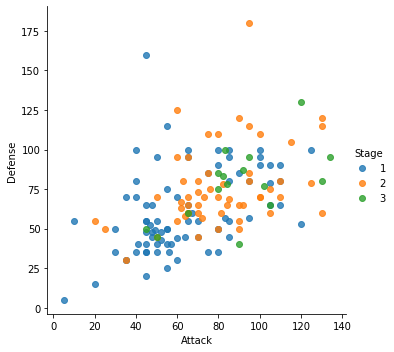

In [5]:
#scatterplot arguements
sns.lmplot(x='Attack', y='Defense', data=df, 
          fit_reg=False, #no regression line
          hue='Stage')   #color by evolution stage

Looking better, but we can improve this scatter plot further. For example, all of our Pokemon have positive Attack and Defense values, yet our axes limits fall below zero. let's see how we can fix that... 

CUSTOMIZING WITH MATPLOTLIB

Remember, Seaborn is a high-level interface to matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib

Setting your axes limits is one of those times, but the process is pretty simple:
    1. First, invoke your Seaborn plotting function as normal.
    2. Then, invoke Matplotlib's customization functions. In this case, we'll use its ylim() and xlim() functions.
    
    

Here's our new scatter plot with sensible axes limits:


(0, 141.9881096001028)

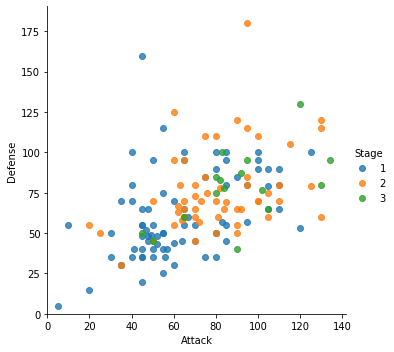

In [6]:
#plot using seaborn
sns.lmplot(x='Attack',y='Defense', data=df,fit_reg=False,hue='Stage')

#tweak using matplotlib
plt.ylim(0,None)
plt.xlim(0,None)

# The Role of Pandas

Even though this is a Seaborn tutorial, Pandas actually plays a very important role. You see, Seaborn's plotting functions benefit from a dataframe that's reasonably formatted.

For example, let's say we wanted to make a box plot for our Pokemon's combat stats:

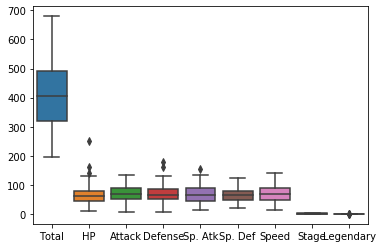

In [7]:
sns.boxplot(data=df)

Well, that's a reasonable start, but there are some columns we'd probably like to remove:
    1. We can remove the Total since we have individual stats.
    2. We can remove the Stage and Legendary columns because they  aren't combat stats.
    
    In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your dataframe.
    
    Let's create a new dataframe called stats_df that only keeps the stats columns:

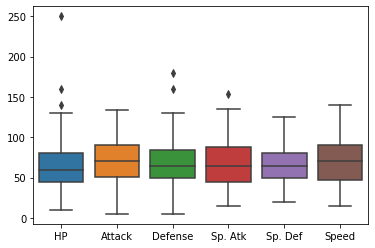

In [8]:
#pre-format dataframe
stats_df=df.drop(['Total','Stage','Legendary'],axis=1)

#new boxplot using stats_df
sns.boxplot(data=stats_df)

# SEABORN THEMES

Another advantage of Seaborn is that it comes with decent style right out of box. The default theme is called 'darkgrid'.

Next, we'll change the theme to 'whitegrid' while making a violin plot

1. Violin plots are useful alternatives to boxplots.
2. They show the distribution (through the thickness of the violin) instead of oonly the summary statistics.

For example, we can visualize the distribution of Attacks by Pokemon primary type:

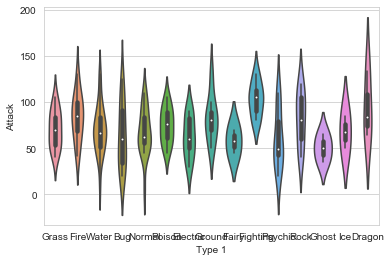

In [9]:
#set theme, then plot violin plot
sns.set_style('whitegrid')

#violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

As you can see, Dragon types tend to have higher Attacks stats than Ghost types, but also have greater variance

Now, Pokemon fans might find something quite jarring about the plot: The colors are nonsensical. Why is the grass type coloured pink or the Water type coloured orange? We must fix this!

# COLOR PALETTES

Fortunately, Seaborn allows us to set custom colot palettes. We can simply create an ordered Python list of color hex values

Let's use BUlbapedia to help us create a new color palette:


In [10]:
pkmn_type_colors=['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                 ]

Wonderful. Now, we can simply use the palette= arguement to recolor our chart

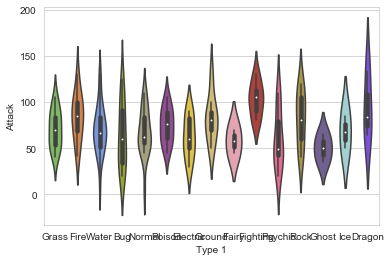

In [11]:
#violin plot with pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)#set color palette

Violin plots are great for visuaizing distributions. However, since we only have 151 pokemon in out dataset, we may want to simply display each point.

That's where the swarm plot comes in. This visualization will show each point, while 'stacking' those with similar values.

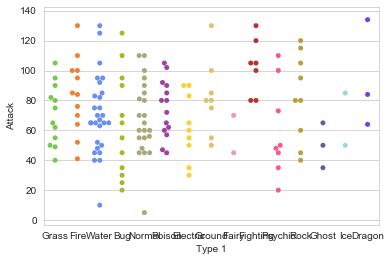

In [12]:
#swarm plot with pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

That's handy, but can't we combine our swarm plot and the violin plot? After all, they display similar information, right?

# OVERLAYING PLOTS

The answer is yes.

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with matplotlib. here's what we'll do:

1. First, we'll make our figure larger using matplotlib.
2. Then, we'll plot the violin plot. However, we'll set inner=none to remove the bars inside the violins.
3. Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
4. Finally, we'll set a title using matplotlib.

Text(0.5, 1.0, 'Attack by Type')

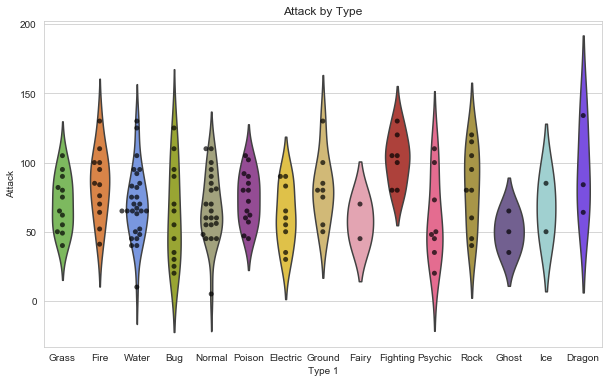

In [13]:
#1. set figure size with matplotlib
plt.figure(figsize=(10,6))

#2. create violin plot
sns.violinplot(x='Type 1',y='Attack',data=df,inner=None, #remove the bars inside the violins
              palette=pkmn_type_colors)

#3. create swarm plot
sns.swarmplot(x='Type 1',y='Attack',data=df,
             color='k', #make points black
             alpha=0.7) #and slightly transparent

#4. set title with matplotlib
plt.title('Attack by Type')

Awesome, now we have a pretty chart that tells us how Attack values are distributed across different Pokémon types. But what it we want to see all of the other stats as well?

# PUTTING IT ALL TOGETHER

Well, we could certainly repeat that chart for each stat. But we can also combine the information into one chart... we just have to do some data wrangling with Pandas beforehand.

In [14]:
#First 5 rows of stats_df
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


As you can see, all of our stats are in separate columns. Instead, we want to 'melt' them all into 1 column.

To do so, we'll use Panda's melt() funstion. It takes 3 arguements:
    
    1. First, the dataframe to melt.
    2. Second, ID variables to keep(Pandas will melt all of the oher ones).
    3. Finally, a name for the ew, melted variable.
    
    here's the output:

In [15]:
#1. melt dataframe
melted_df=pd.melt(stats_df,id_vars=['Name','Type 1','Type 2'],#2. variables to keep
                 var_name='Stats')#3. name of the melted variable
melted_df.head(5)

,Name,Type 1,Type 2,Stats,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


All 6 of the stat columns have been "melted" into one, and the new Stat column indicates the original stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed). For example, it's hard to see here, but Bulbasaur now has 6 rows of data.

In fact, if you print the shape of these two DataFrames...



In [16]:
#shape comparison
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


...you'll find that melted_df has 6 times the number of rows as stats_df.

Now we can make a swarm plot with melted_df.

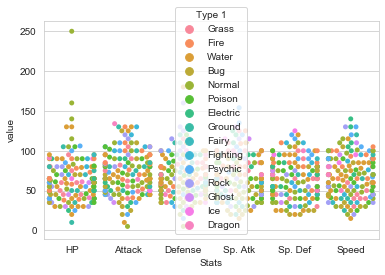

In [17]:
#swarm with melted_df
sns.swarmplot(x='Stats',y='value',data=melted_df,hue='Type 1')

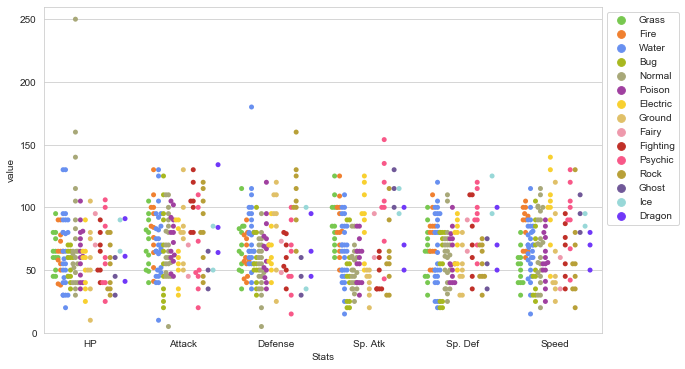

In [18]:
#1. enlarge the plot
plt.figure(figsize=(10,6))

sns.swarmplot(x='Stats',y='value',data=melted_df,
             hue='Type 1', 
             dodge=True, #2. separate points by hue, split is known as dodge here
             palette=pkmn_type_colors)#3. use pokemon palette

#4. adjust the y-axis
plt.ylim(0,260)

#5. place legend to the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

We're going to conclude this tutorial with a few quick-fire data visualizations, just to give you a sense of what's possible with Seaborn.

# HEAT MAP

Heat map help you visualize matrix-like data


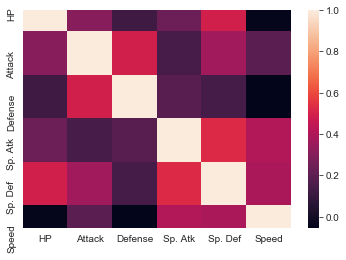

In [19]:
#calculate correlations
corr=stats_df.corr()

#heatmap
sns.heatmap(corr)

# HISTOGRAM

Histogram allow you to plot the distribution of numeric variables


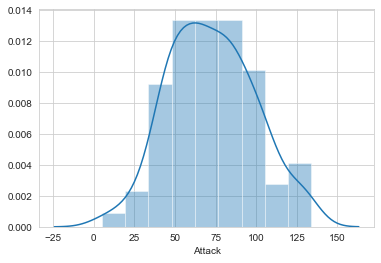

In [20]:
#distribution plot(a.k.a histogram)
sns.distplot(df.Attack)

# BAR PLOT

Bar plots help you visualise the distributions of categorical variables.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

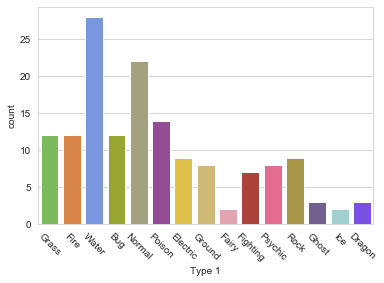

In [21]:
#count plot(a.k.a bar plot)
sns.countplot(x='Type 1',data=df,palette=pkmn_type_colors)

#rotate x-labels
plt.xticks(rotation=-45)

# FACTOR PLOT HAS BEEN RENAMED AS CATPLOT(CATEGORICAL PLOT)

Catplot make it easy to separate plots by categorical classes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

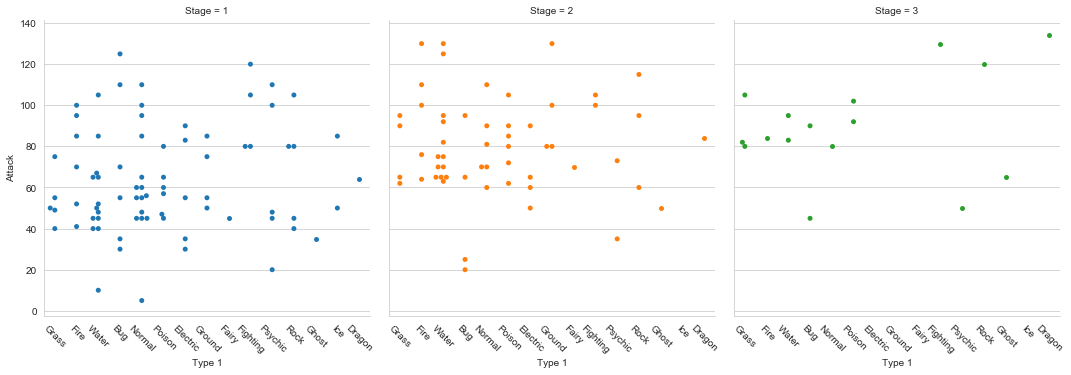

In [22]:
#factor plot
g=sns.catplot(x='Type 1',y='Attack',data=df,
                 hue='Stage',#color by stage
                 col='Stage',#separate by stage
                 kind='swarm')#swarmplot

#rotate x-axis labels
g.set_xticklabels(rotation=-45)

#doesn't work because only rotates last plot
plt.xticks(rotation=-45)

# DENSITY PLOT

Density plots display the distribution between 2 variables

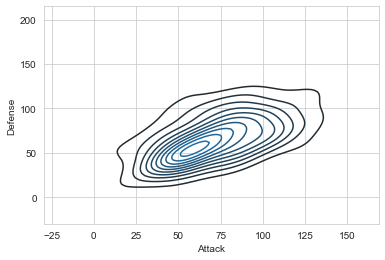

In [23]:
#density plot
sns.kdeplot(df.Attack, df.Defense)

# JOINT DISTRIBUTION PLOT

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions

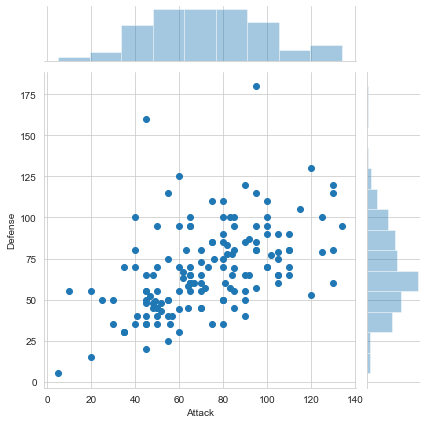

In [24]:
#joint distribution plot
sns.jointplot(x='Attack',y='Defense', data=df)

Congratulations... you've made it to the end of this Python Seaborn tutorial!

We've just concluded a tour of key Seaborn paradigms and showed you many examples along the way.